In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import pickle


In [4]:
path1 ="/volume/OCT/OCT2017/train"
path2 ="/volume/OCT/OCT2017/test"
path3 ="/volume/OCT/OCT2017/val"
test_ratio=0.2
val_ratio=0.2
image_size=(128,128,3)

In [5]:
myList = os.listdir(path1)
print("Total Number of Classes Detected :",len(myList))

Total Number of Classes Detected : 4


In [7]:
noOfclasses= len(myList)
print(myList)

['DRUSEN', 'NORMAL', 'CNV', 'DME']


In [9]:
images=[]
classNo=[]
CATEGORIES = ['NORMAL',"CNV","DME","DRUSEN"]
for x in myList:
  myPicList = os.listdir(path1+"/"+str(x))
  for y in myPicList:
    curImg = cv2.imread(path1+"/"+str(x)+"/"+y)
    curImg = cv2.resize(curImg,(image_size[0],image_size[1]))
    images.append(curImg)
    classNo.append(CATEGORIES.index(x))
  print(x,end=" ")

DRUSEN NORMAL CNV DME 

In [10]:
x_test=[]
y_test=[]
CATEGORIES = ['NORMAL',"CNV","DME","DRUSEN"]
for x in myList:
  myPicList = os.listdir(path2+"/"+str(x))
  for y in myPicList:
    curImg = cv2.imread(path2+"/"+str(x)+"/"+y)
    curImg = cv2.resize(curImg,(image_size[0],image_size[1]))
    x_test.append(curImg)
    y_test.append(CATEGORIES.index(x))
  print(x,end=" ")

DRUSEN NORMAL CNV DME 

In [16]:
x_val=[]
y_val=[]
CATEGORIES = ['NORMAL',"CNV","DME","DRUSEN"]
for x in myList:
  myPicList = os.listdir(path3+"/"+str(x))
  for y in myPicList:
    curImg = cv2.imread(path3+"/"+str(x)+"/"+y)
    curImg = cv2.resize(curImg,(image_size[0],image_size[1]))
    x_val.append(curImg)
    y_val.append(CATEGORIES.index(x))
  print(x,end=" ")

DRUSEN NORMAL CNV DME 

In [17]:
print(len(images))
print(len(classNo))

83484
83484


In [18]:
x_train = np.array(images)
y_train = np.array(classNo)

x_test = np.array(x_test)
y_test = np.array(y_test)
x_val = np.array(x_val)
y_val = np.array(y_val)
print(x_train.shape)
print(x_test.shape)

(83484, 128, 128, 3)
(968, 128, 128, 3)


In [19]:
del images
del classNo

In [20]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(83484, 128, 128, 3)
(968, 128, 128, 3)
(32, 128, 128, 3)


In [21]:
numofSamples=[]
for x in range(0,noOfclasses):
  numofSamples.append(len(np.where(y_train==x)[0]))

In [22]:
print(numofSamples)

[26315, 37205, 11348, 8616]


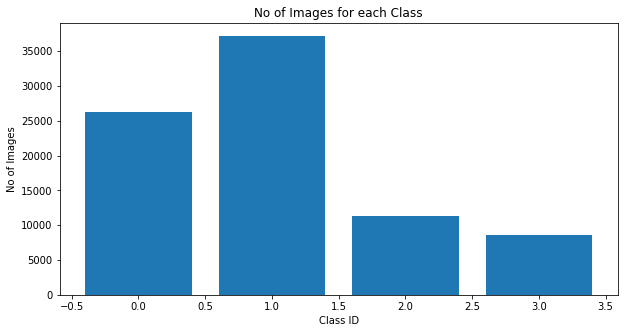

In [23]:
plt.figure(figsize=(10,5))
plt.bar(range(0,noOfclasses),numofSamples)
plt.title('No of Images for each Class')
plt.xlabel("Class ID")
plt.ylabel("No of Images")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='labels', ylabel='count'>

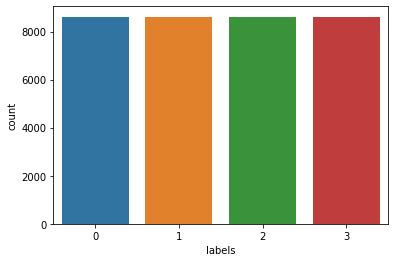

In [26]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import seaborn as sns
X_trainShape = x_train.shape[1]*x_train.shape[2]*x_train.shape[3]
X_trainFlat = x_train.reshape(x_train.shape[0], X_trainShape)
Y_train = y_train
ros = RandomUnderSampler()
X_trainRos, Y_trainRos = ros.fit_resample(X_trainFlat, Y_train)
# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 4)
# Make Data 2D again
for i in range(len(X_trainRos)):
    height, width, channels = image_size[0],image_size[1],3
    X_trainRosReshaped = X_trainRos.reshape(len(X_trainRos),height,width,channels)
# Plot Label Distribution
dfRos = pd.DataFrame()
dfRos["labels"]=Y_trainRos
labRos = dfRos['labels']
sns.countplot(labRos)

In [27]:
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

In [28]:
del x_train
del y_train

In [29]:
x_train = np.array(list(map(preProcessing,X_trainRosReshaped)))
print(x_train[0].shape)

(128, 128)


In [30]:
x_test = np.array(list(map(preProcessing,x_test)))
print(x_test[0].shape)

(128, 128)


In [31]:
#print(x_validation[0].shape)
x_validation = np.array(list(map(preProcessing,x_val)))
print(x_validation[0].shape)

(128, 128)


In [32]:
print(x_train.shape)

(34464, 128, 128)


In [33]:
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
print(X_train.shape)

(34464, 128, 128, 1)


In [34]:
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
X_validation = x_validation.reshape(x_validation.shape[0],x_validation.shape[1],x_validation.shape[2],1)

In [35]:
del x_test
del x_train
del x_validation

In [36]:
y_train = to_categorical(Y_trainRos,noOfclasses)
y_test = to_categorical(y_test,noOfclasses)
y_validation = to_categorical(y_val,noOfclasses)

In [37]:
class CustomCallback(tf.keras.callbacks.Callback):
  def __init__(self,fraction):
    super(CustomCallback,self).__init__()
    self.fraction = fraction
    self.train_a = [];
    self.val_a =[];

    with open('log.txt','w') as f:
      f.write('Starting of logging..\n')

    self.fig = plt.figure(figsize=(4,3))
    self.ax = plt.subplot(1,1,1)
    plt.ion()

  def on_train_begin(self,logs=None):
    self.fig.show()
    self.fig.canvas.draw()
  
  def on_train_end(self,logs=None):
    with open('log.txt','a') as f:
      f.write('End of logging..\n')
  def on_epoch_begin(self,epoch,logs=None):
    lr= tf.keras.backend.get_value(self.model.optimizer.lr)
    lr *= self.fraction
    tf.keras.backend.set_value(self.model.optimizer.lr,lr)
    with open('log.txt','a') as f:
      f.write('At epoch {:02d}, learning rate changed to {:.4f}\n'.format(epoch,lr))
  def on_epoch_end(self,epoch,logs=None):
    val_acc = logs.get('val_accuracy')
    train_acc = logs.get('accuracy')
    self.train_a.append(train_acc)
    self.val_a.append(val_acc)
    with open('log.txt','a') as f:
        f.write('At epoch {:02d}, training accuracy: {:.3f}, validation accuracy: {:.3f}\n'.format(epoch,train_acc,val_acc))
    self.ax.clear()
    self.ax.plot(range(1+epoch),self.train_a,label="Training")
    self.ax.plot(range(1+epoch),self.val_a,label="Validation")
    self.ax.set_xlabel('Epochs')
    self.ax.set_ylabel('Accuracy')
    self.ax.legend()
    self.fig.canvas.draw()
    self.fig.show()

In [38]:
def model():
  filters=60
  sizeoffilter1 = (5,5)
  sizeoffilter2 = (4,4)
  sizeoffilter3 = (3,3)
  sizeofpool = (2,2)
  node=5000

  model = Sequential();
  model.add((Conv2D(filters,sizeoffilter1,input_shape=(image_size[0],image_size[1],1)
  ,activation="relu")))

  model.add((Conv2D(filters,sizeoffilter1,activation="relu")))
  model.add((Conv2D(filters//2,sizeoffilter2,activation="relu")))
  model.add((Conv2D(filters//2,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add((Conv2D(filters,sizeoffilter1,activation="relu")))
  model.add((Conv2D(filters//2,sizeoffilter2,activation="relu")))
  model.add((Conv2D(filters//2,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add((Conv2D(filters,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add((Conv2D(filters//2,sizeoffilter3,activation="relu")))
  model.add((Conv2D(filters//2,sizeoffilter3,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(node,activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(noOfclasses,activation="softmax"))

  model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

  return model
  
model=model()

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 60)      1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 60)      90060     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 117, 117, 30)      28830     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 114, 114, 30)      14430     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 57, 57, 30)        0         
_________________________________________________________________
dropout (Dropout)            (None, 57, 57, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 53, 53, 60)        4

In [40]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
history = model.fit(X_train,Y_trainRosHot,epochs=50,validation_data =(X_validation,y_validation) ,batch_size=256,
                    shuffle=True,
                    max_queue_size=20,
                    use_multiprocessing=True,
                    workers=1,
                   callbacks=[CustomCallback(fraction=0.9)])

Epoch 1/50
 26/135 [====>.........................] - ETA: 49:39 - loss: 1.4456 - accuracy: 0.2494

In [ ]:
prediction = model.predict